In [1]:
import pandas as pd
import seaborn as sns

In [21]:
df = pd.read_csv('../data/reports_2.csv')

In [22]:
df.head()

,collector_timestamp,flow_id,src_ip,dst_ip,src_port,dst_port,protocol,seq_num,reporting_sw,hops,...,egress_timestamp,hop_latency,ingress_timestamp,l1_egress_port_id,l1_ingress_port_id,l2_egress_port_id,l2_ingress_port_id,queue_occupancy,queue_occupancy_id,switch_id
0,1.713562e+09,0,10.0.2.2,10.0.4.2,7676,7878,17,0,2,3,...,1713561748774843000,2941657019,0,4,0,0,0,0,0,2
1,1.713562e+09,0,10.0.2.2,10.0.4.2,7676,7878,17,0,2,3,...,1713561748773298000,486,1713561748772812000,2,1,0,0,0,0,1
2,1.713562e+09,0,10.0.2.2,10.0.4.2,7676,7878,17,0,2,3,...,1713561748772007000,839,1713561748771168000,1,2,0,0,0,0,0
3,1.713562e+09,1,10.0.2.2,10.0.4.2,7676,7878,17,1,2,3,...,1713561748874694000,2941756870,0,4,0,0,0,0,0,2
4,1.713562e+09,1,10.0.2.2,10.0.4.2,7676,7878,17,1,2,3,...,1713561748873320000,504,1713561748872816000,2,1,0,0,0,0,1


In [23]:
df_no_first_sw = df[df['ingress_timestamp'] != 0]

In [24]:
df_no_first_sw.head()

,collector_timestamp,flow_id,src_ip,dst_ip,src_port,dst_port,protocol,seq_num,reporting_sw,hops,...,egress_timestamp,hop_latency,ingress_timestamp,l1_egress_port_id,l1_ingress_port_id,l2_egress_port_id,l2_ingress_port_id,queue_occupancy,queue_occupancy_id,switch_id
1,1.713562e+09,0,10.0.2.2,10.0.4.2,7676,7878,17,0,2,3,...,1713561748773298000,486,1713561748772812000,2,1,0,0,0,0,1
2,1.713562e+09,0,10.0.2.2,10.0.4.2,7676,7878,17,0,2,3,...,1713561748772007000,839,1713561748771168000,1,2,0,0,0,0,0
4,1.713562e+09,1,10.0.2.2,10.0.4.2,7676,7878,17,1,2,3,...,1713561748873320000,504,1713561748872816000,2,1,0,0,0,0,1
5,1.713562e+09,1,10.0.2.2,10.0.4.2,7676,7878,17,1,2,3,...,1713561748872143000,656,1713561748871487000,1,2,0,0,0,0,0
7,1.713562e+09,2,10.0.2.2,10.0.4.2,7676,7878,17,2,2,3,...,1713561748973996000,558,1713561748973438000,2,1,0,0,0,0,1


In [25]:
aggregated = df_no_first_sw[['flow_id', 'hop_latency', 'collector_timestamp']].groupby(by='flow_id')\
    .agg({'hop_latency': 'sum', 'collector_timestamp': 'first'})

<Axes: xlabel='collector_timestamp', ylabel='hop_latency'>

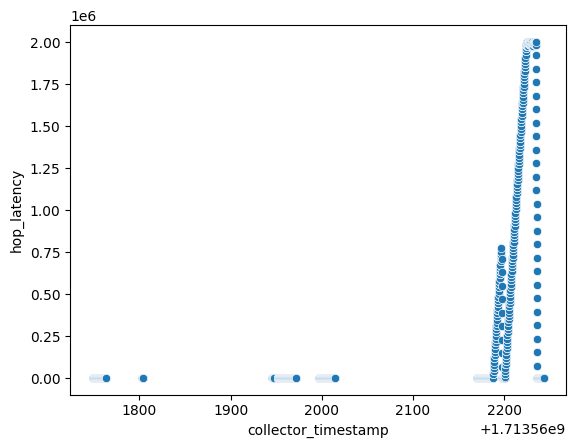

In [26]:
sns.scatterplot(aggregated, x='collector_timestamp', y='hop_latency')

<Axes: xlabel='collector_timestamp', ylabel='queue_occupancy'>

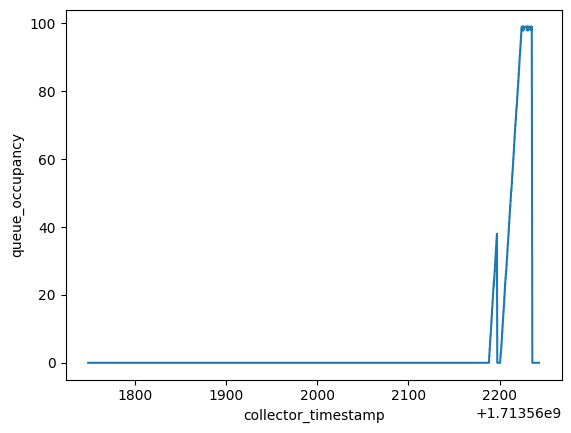

In [54]:
sns.lineplot(df[df['switch_id'] == 1], x='collector_timestamp', y='queue_occupancy')

In [48]:
df2 = pd.read_csv('../data/log.csv')

<Axes: xlabel='ts', ylabel='lat'>

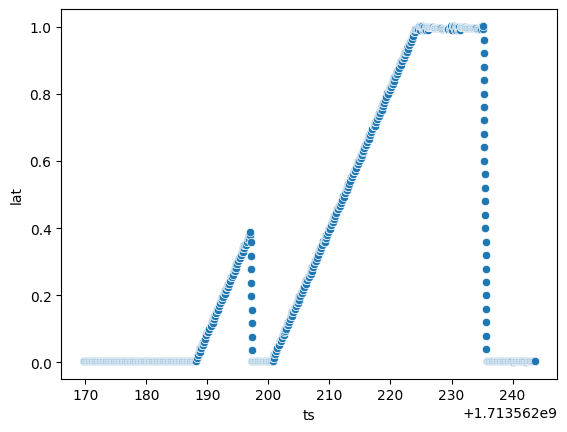

In [49]:
sns.scatterplot(df2, x='ts', y='lat')

In [46]:
df2['lat'] = 0.5

<Axes: xlabel='ts', ylabel='lat'>

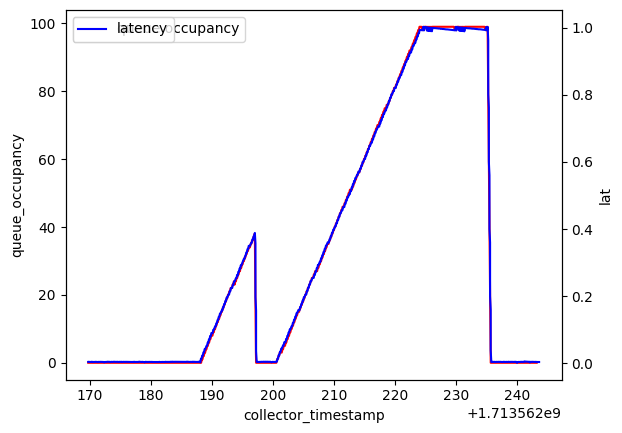

In [55]:
from matplotlib import pyplot as plt

sw1df = df[df['switch_id'] == 1]
# Create a scatter plot for df1
sns.lineplot(x='collector_timestamp', y='queue_occupancy', data=sw1df[sw1df['collector_timestamp'] > df2.iloc[0]['ts']], color='red', label='queue occupancy')

# Create a secondary y-axis for df2
ax2 = plt.twinx()

# # Plot df2 on the secondary y-axis
sns.lineplot(x='ts', y='lat', data=df2, color='blue', ax=ax2, label='latency')